![Ironhack logo](https://i.imgur.com/1QgrNNw.png)
## Project 2 - Data Cleaning Project

### Shark Attack Project

Data source: https://www.kaggle.com/teajay/global-shark-attacks/version/1

**QUESTION**: Is the number of shark attacks increasing over the years in the country with the most attacks?


In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import re

**Step 1 - Reading and understanding data**

In [2]:
# reading data set
df_shark = pd.read_csv('C:/Users/sonia/OneDrive/Sonia/Ironhack/Aulas/Modulo1/Projetos/Projeto2-SharkAttacks/attacks.csv',encoding='latin1')
df_shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
# dataframe size
df_shark.shape

(25723, 24)

In [4]:
# dataframe descriptive information
df_shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
# Check for any duplicate entries
df_shark.duplicated().sum()

19411

*Observations:*

- We have a total of 25.723 rows. But the column with more values have 33,8% of non nulls values.
- In column 22 and 23, we only have 1 and 2 non-null value, respectively. So we will drop them.
- There are 19411 duplicates entries. We will drop.

Before start dropping columns, is necessary:

    1) Do a security copy of a original file
    2) Do a process to standardization column names, to be easier to acess them.

In [6]:
# create a copy of dataset for backup.
df_shark_original = df_shark.copy()
df_shark_original.shape

(25723, 24)

In [7]:
# original column names:
columns_names = df_shark.columns
columns_names

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
# standardization column names
df_shark_columns = [column.lower().replace(' ','').replace('.','').replace('(y/n)','') for column in columns_names]
df_shark.columns = df_shark_columns
df_shark_columns

['casenumber',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal',
 'time',
 'species',
 'investigatororsource',
 'pdf',
 'hrefformula',
 'href',
 'casenumber1',
 'casenumber2',
 'originalorder',
 'unnamed:22',
 'unnamed:23']

In [9]:
# drop duplicates
df_shark = df_shark.drop_duplicates()

In [10]:
# data shape after dropping duplicates
df_shark.shape

(6312, 24)

In [11]:
# drop columns Unnamed: 22, Unnamed: 23
df_shark.drop(['unnamed:22', 'unnamed:23'], axis=1, inplace=True)

In [12]:
# data shape after dropping columns Unnamed: 22, Unnamed: 23
df_shark.shape

(6312, 22)

Droping variables which we are not going to use in this data analysis.

- `casenumber`, `name`, `sex`, `age`, `time` , `species` , `investigatororsourcecolumn` , `pdf`,`hrefformula`, `href`, `casenumber1`, `casenumber2`, `originalorder` are a record index which do not have any significance in out analysis. So will be drop the column.

In [13]:
# drop columns not useful
df_shark = df_shark.drop(['casenumber','name','sex','age', 'time', 'species', 'investigatororsource', 'pdf', 'hrefformula','href', 'casenumber1', 'casenumber2', 'originalorder'], axis=1)

Analyzing all select columns in the model.

In [14]:
df_shark

,date,year,type,country,area,location,activity,injury,fatal
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some rows almost with no value. So will be drop rows with at least 80% non-NA values.

In [15]:
# dropping rows
df_shark = df_shark.dropna(axis=0, thresh=df_shark.shape[1]*0.80)

In [16]:
df_shark.shape

(5838, 9)

In [17]:
df_shark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 0 to 6301
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5838 non-null   object 
 1   year      5837 non-null   float64
 2   type      5837 non-null   object 
 3   country   5834 non-null   object 
 4   area      5671 non-null   object 
 5   location  5603 non-null   object 
 6   activity  5514 non-null   object 
 7   injury    5831 non-null   object 
 8   fatal     5482 non-null   object 
dtypes: float64(1), object(8)
memory usage: 456.1+ KB


In [18]:
df_shark.isnull().sum()

date          0
year          1
type          1
country       4
area        167
location    235
activity    324
injury        7
fatal       356
dtype: int64

After excluding some columns and duplicate rows, we ended up with 9 columns and 5983 rows.

Now is important to analyze the data quality of each column.

Is already possible to see that all columns has more than 90% non-null value.

**Step 2 - Checking data**

**2.1** Checking `year` column

In [19]:
df_shark['year'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [20]:
# counting the number of cases in values that do not correspond to a year number

df_shark.loc[(df_shark['year']==0)|(df_shark['year']==5)| (df_shark['year'] != df_shark['year'])]

,date,year,type,country,area,location,activity,injury,fatal
6079,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,FATAL,Y
6176,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,Aboriginal rock carving depicts man being atta...,N
6178,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,"FATAL, shark ""bit off all lower parts of him u...",Y
6179,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,Herodotus tells of sharks attacking men in the...,Y
6180,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,Depicts shipwrecked sailors attacked by a sha...,Y
...,...,...,...,...,...,...,...,...,...
6296,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,FATAL,Y
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,FATAL,Y
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,FATAL,Y
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,FATAL,Y


*`Year` column observations:*

- The line with non value, correspond year 1836. This will be correct.
- Year equals 5, is correct.
- Years equals 0 need to be observe with more details.

In [21]:
# correct year NaN

df_shark.loc[(df_shark['year'] != df_shark['year']), 'year'] = 1836
df_shark['year'][6079]

C:\Users\sonia\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


1836.0

In [22]:
# detail of year equals 0
df_shark.loc[df_shark['year']==0,'date'].unique()

array(['Ca. 336.B.C..', '493 B.C.', 'Ca. 725 B.C.', 'Before 1939',
       '1990 or 1991', 'Before 2016', 'Before Oct-2009', 'Before 1934',
       '2009?', 'Before 1930', '1880-1899', 'Before 1909', 'Before 2012',
       'Before 1908', 'Before 2011', 'Before 2009', 'Beforer 1994',
       'Before 1963', '1896-1913', 'Before 08-Jun-1912', 'Before 1901',
       'No date, late 1960s', 'Before 2006', 'Before 2003', 'Before 2004',
       'Before 1962', '1950s', '2003?', 'No date', 'Before Feb-1998',
       'No date, Before May-1996', 'No date, Before Mar-1995',
       'Before 1996', 'No date, Before Aug-1989',
       'No date, Before Aug-1987', 'No date, Before 1987',
       'No date, Before  1975', 'No date, Before 1975',
       'No date, Before 3-Jan-1967', 'No date, Before 1963',
       'No date, Before 8-May-1965', 'No date, Before 1902',
       'No date, After August 1926 and before 1936', 'Before 1961',
       '1960s', 'Before  19-Jun-1959', 'Before  24 Apr-1959',
       'Before  1958',

With this breakdown of the date information it is possible to observe that this data set will not be significant for the analysis. So it will be drop.

In [28]:
# drop rows year = 0
df_shark = df_shark.drop(df_shark[df_shark.year == 0].index)


In [29]:
df_shark.loc[df_shark['year']==0,'date'].unique()

array([], dtype=object)

**2.2** Checking `country` column

In [30]:
df_shark['country'].unique()

array(['united states', 'australia', 'mexico', 'brazil', 'united kingdom',
       'south africa', 'thailand', 'costa rica', 'maldives',
       'the bahamas', 'new caledonia', 'ecuador', 'malaysia', 'libya',
       'cuba', 'mauritius', 'new zealand', 'spain', 'samoa',
       'solomon islands', 'japan', 'egypt',
       'st helena, british overseas territory', 'comoros', 'réunion',
       'french polynesia', 'united arab emirates', 'philippines',
       'indonesia', 'china', 'colombia', 'fiji', 'dominican republic',
       'cayman islands', 'aruba', 'mozambique', 'puerto rico',
       'st. martin', 'france', 'trinidad & tobago', 'kiribati', 'israel',
       'taiwan', 'palestinian territories', 'seychelles', 'jamaica',
       'nigeria', 'tonga', 'scotland', 'canada', 'italy', 'saudi arabia',
       'chile', 'antigua', 'papua new guinea', 'kenya', 'russia',
       'turks & caicos', 'united arab emirates (uae)', 'portugal',
       'south korea', 'malta', 'vietnam', 'madagascar', 'guam', 'pan

In [31]:
# counting how many non value in country column
df_shark['country'].isnull().sum()

4

Correting country names: 

In [32]:
dictionary_country = {
    'admiralty islands':  'papua new guinea',
    'azores':             'portugal',
    'bahamas':            'the bahamas',
    'british isles':      'united kingdom',
    'british new guinea': 'papua new guinea',
    'columbia':           'colombia',
    'england':            'united kingdom',
    'new britain':        'papua new guinea',
    'new guinea':         'papua new guinea',
    'okinawa':            'japan',
    'red sea':            'egypt',
    'reunion':            'réunion',
    'usa':                'united states',}

df_shark['country'] = df_shark['country'].str.lower()

df_shark = df_shark.replace({'country': dictionary_country})
df_shark['country'].unique()

array(['united states', 'australia', 'mexico', 'brazil', 'united kingdom',
       'south africa', 'thailand', 'costa rica', 'maldives',
       'the bahamas', 'new caledonia', 'ecuador', 'malaysia', 'libya',
       'cuba', 'mauritius', 'new zealand', 'spain', 'samoa',
       'solomon islands', 'japan', 'egypt',
       'st helena, british overseas territory', 'comoros', 'réunion',
       'french polynesia', 'united arab emirates', 'philippines',
       'indonesia', 'china', 'colombia', 'fiji', 'dominican republic',
       'cayman islands', 'aruba', 'mozambique', 'puerto rico',
       'st. martin', 'france', 'trinidad & tobago', 'kiribati', 'israel',
       'taiwan', 'palestinian territories', 'seychelles', 'jamaica',
       'nigeria', 'tonga', 'scotland', 'canada', 'italy', 'saudi arabia',
       'chile', 'antigua', 'papua new guinea', 'kenya', 'russia',
       'turks & caicos', 'united arab emirates (uae)', 'portugal',
       'south korea', 'malta', 'vietnam', 'madagascar', 'guam', 'pan

In [33]:
for inc_country in df_shark['country']:
    if isinstance(inc_country, str):
        cor_country = re.sub('\&','and',inc_country)
        df_shark['country'] = df_shark['country'].replace(inc_country,cor_country)
        cor_country = re.sub('\?|\.|/.+|\(.+\)',"",inc_country)
        df_shark['country'] = df_shark['country'].replace(inc_country,cor_country)
df_shark['country'].unique()

array(['united states', 'australia', 'mexico', 'brazil', 'united kingdom',
       'south africa', 'thailand', 'costa rica', 'maldives',
       'the bahamas', 'new caledonia', 'ecuador', 'malaysia', 'libya',
       'cuba', 'mauritius', 'new zealand', 'spain', 'samoa',
       'solomon islands', 'japan', 'egypt',
       'st helena, british overseas territory', 'comoros', 'réunion',
       'french polynesia', 'united arab emirates', 'philippines',
       'indonesia', 'china', 'colombia', 'fiji', 'dominican republic',
       'cayman islands', 'aruba', 'mozambique', 'puerto rico',
       'st martin', 'france', 'trinidad and tobago', 'kiribati', 'israel',
       'taiwan', 'palestinian territories', 'seychelles', 'jamaica',
       'nigeria', 'tonga', 'scotland', 'canada', 'italy', 'saudi arabia',
       'chile', 'antigua', 'papua new guinea', 'kenya', 'russia',
       'turks and caicos', 'united arab emirates ', 'portugal',
       'south korea', 'malta', 'vietnam', 'madagascar', 'guam', 'panam

In [34]:
# verifying country with non value
df_shark[df_shark['country']!= df_shark['country']]

,date,year,type,country,area,location,activity,injury,fatal
4266,1956,1956.0,Sea Disaster,NaN,Between Comores & Madagascar,Geyser Bank,Shipwreck,FATAL,Y
4498,Dec-1949,1949.0,Sea Disaster,NaN,Caribbean Sea,Between Cuba & Costa Rica,"Sea Disaster, sinking of the motorship Wingate",Fatal or drowning or scavenging,Y
5020,Reported 27-Apr-1931,1931.0,Unprovoked,NaN,French Southern Territories,Île Saint-Paul,"Fishing, boat capsized",FATAL,Y
6137,05-Jul-1787,1787.0,Unprovoked,NaN,St Helena,Landing Place,Swimming,FATAL,Y


In [35]:
df_shark.loc[df_shark['area'] == 'Caribbean Sea', 'country'] = 'caribe'
df_shark.loc[df_shark['area'] == 'French Southern Territories', 'country'] = 'france'
df_shark.loc[df_shark['area'] == 'St Helena', 'country'] = 'st helena'

Geyser bank doesn't have a definition about the country. So, this row will be drop.

In [36]:
# drop rows location 'Geyser Bank'
df_shark = df_shark.drop(df_shark[df_shark.location == 'Geyser Bank'].index)

In [37]:
df_shark['country'].isnull().sum()

0

**2.3** Checking `fatal` column

In [38]:
df_shark['fatal'].value_counts()

N          4101
Y          1217
UNKNOWN      54
 N            7
N             1
y             1
M             1
2017          1
Name: fatal, dtype: int64

In [39]:
# correct some values
df_shark.loc[df_shark['fatal'] == ' N', 'fatal'] = 'N'
df_shark.loc[df_shark['fatal'] == 'N ', 'fatal'] = 'N'
df_shark.loc[df_shark['fatal'] == 'y', 'fatal'] = 'Y'

In [40]:
df_shark['fatal'].value_counts()

N          4109
Y          1218
UNKNOWN      54
M             1
2017          1
Name: fatal, dtype: int64

In [41]:
# drop rows with not available values
df_shark = df_shark.drop(df_shark[df_shark.fatal == 'UNKNOWN'].index)
df_shark = df_shark.drop(df_shark[df_shark.fatal == '2017'].index)
df_shark = df_shark.drop(df_shark[df_shark.fatal == 'M'].index)

In [42]:
df_shark['fatal'].value_counts()

N    4109
Y    1218
Name: fatal, dtype: int64

After cleaning these columns it is possible analyze the number of shark attacks over the years.

In [43]:
# total of shark attacks by country
df_shark['country'].value_counts()

united states       2147
australia           1267
south africa         540
papua new guinea     142
new zealand          122
                    ... 
cayman islands         1
gulf of aden           1
aruba                  1
ghana                  1
the balkans            1
Name: country, Length: 167, dtype: int64

The United States is the country with the highest number of shark attacks. So, let's analyze the data over the years.

(1850, 2018)

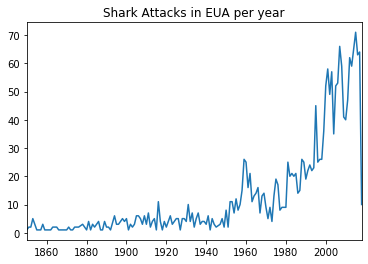

In [44]:
# graphic to display the number of shark attack in united states per year

df_shark['year_usa'] = df_shark[df_shark['country']=='united states']['year']
eua_yy = df_shark['year_usa'].value_counts().sort_index()

%matplotlib inline
eua_yy.plot(title="Shark Attacks in EUA per year")
import matplotlib.pyplot as plt
plt.xlim([1850, 2018])

[Text(0, 0.5, 'Number of shark attacks in EUA')]

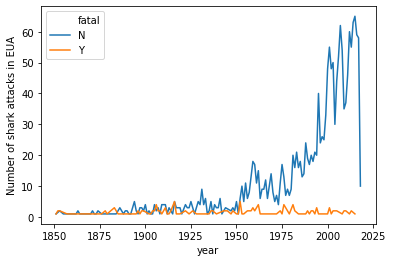

In [45]:
fatal_yy = df_shark[(df_shark['year']>1850)&(df_shark['country']=='united states')].groupby(by=['year','fatal'],as_index=False)[['type']].count()
%matplotlib inline
graf_fatal = sns.lineplot(x="year", y="type", hue="fatal", data = fatal_yy)
graf_fatal.set(ylabel='Number of shark attacks in EUA')


There has been an increase in the total number of shark attacks over the years in the United States.

However, it is possible to observe that the number of fatal cases remained without a significant increase. What really increased were non-fatal cases. 

This makes us question whether there has actually been an increase in the number of cases or whether there has only been an increase in the number of records.